<a href="https://colab.research.google.com/github/harshithard/Temporal-Analysis-of-HSA-using-RNN/blob/main/RNN_for_change_point_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cd drive/My Drive/lysist-data

/content/drive/My Drive/lysist-data


In [ ]:
df = pd.read_csv("lysist_data.csv")

In [ ]:
df

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710
0,0,9.726705,27.620770,34.298030,23.268223,19.786005,26.837740,32.503910,30.488458,40.988947,37.965220,29.289218,34.804088,51.417034,46.352180,46.822891,39.847877,34.976369,39.803987,27.923443,40.779854,21.462195,17.866867,21.265138,43.340181,40.243566,36.963499,26.869700,47.590641,47.112365,39.091250,40.275456,55.513357,60.496157,61.141913,64.983989,68.905566,66.681779,58.569995,48.517763,...,17.386725,23.971000,24.987734,22.565144,15.483732,17.160587,19.303977,15.010679,26.855740,28.617383,24.576320,26.854432,23.512170,6.340050,11.271934,28.802533,35.210987,34.013864,23.102661,22.857490,8.684154,24.122132,32.159531,33.006590,21.627668,19.132762,21.864230,29.933982,31.240597,26.095687,20.099889,12.480601,21.266519,22.570040,10.444981,11.565586,23.314091,14.876917,21.986102,18.616471
1,1,9.726705,27.620770,34.298030,23.268223,19.786005,26.837740,32.503910,30.488458,40.988947,37.965220,29.289218,34.804088,51.417034,46.352180,46.822891,39.847877,34.976369,39.803987,27.923443,40.779854,21.462195,17.866867,21.265138,43.340181,40.243566,36.963499,26.869700,47.590641,47.112365,39.091250,40.275456,55.513357,60.496157,61.141913,64.983989,68.905566,66.681779,58.569995,48.517763,...,17.386725,23.971000,24.987734,22.565144,15.483732,17.160587,19.303977,15.010679,26.855740,28.617383,24.576320,26.854432,23.512170,6.340050,11.271934,28.802533,35.210987,34.013864,23.102661,22.857490,8.684154,24.122132,32.159531,33.006590,21.627668,19.132762,21.864230,29.933982,31.240597,26.095687,20.099889,12.480601,21.266519,22.570040,10.444981,11.565586,23.314091,14.876917,21.986102,18.616471
2,2,9.726705,27.620770,34.298030,23.268223,19.786005,26.837740,32.503910,30.488458,40.988947,37.965220,29.289218,34.804088,51.417034,46.352180,46.822891,39.847877,34.976369,39.803987,27.923443,40.779854,21.462195,17.866867,21.265138,43.340181,40.243566,36.963499,26.869700,47.590641,47.112365,39.091250,40.275456,55.513357,60.496157,61.141913,64.983989,68.905566,66.681779,58.569995,48.517763,...,17.386725,23.971000,24.987734,22.565144,15.483732,17.160587,19.303977,15.010679,26.855740,28.617383,24.576320,26.854432,23.512170,6.340050,11.271934,28.802533,35.210987,34.013864,23.102661,22.857490,8.684154,24.122132,32.159531,33.006590,21.627668,19.132762,21.864230,29.933982,31.240597,26.095687,20.099889,12.480601,21.266519,22.570040,10.444981,11.565586,23.314091,14.876917,21.986102,18.616471
3,3,12.172530,26.447238,33.132393,23.754378,18.260891,24.392157,31.800794,29.799678,39.578836,36.638679,28.250884,33.003819,50.486203,45.714742,46.929498,39.187335,34.003072,39.638799,28.126053,42.204642,23.313436,16.428514,23.127760,43.755423,41.147482,37.109076,27.432470,49.821287,47.450643,40.146882,41.277815,52.619424,62.229924,61.507681,63.993695,67.368493,66.466943,55.829643,48.766012,...,17.006331,23.968795,25.897406,20.336212,12.118584,15.239307,17.694718,14.347159,28.961140,30.442921,27.318949,26.365356,21.861670,8.395434,12.419805,32.646271,39.598195,37.726844,27.838509,25.282509,9.535649,25.807768,34.654749,34.412029,21.941422,18.916754,22.561054,31.066940,32.783832,25.254927,18.263925,15.090211,23.827469,19.524167,10.600498,12.602482,22.234227,16.801468,19.790392,19.196877
4,4,10.445720,25.653379,32.537721,23.336382,17.307770,24.330106,33.515575,28.063806,37.068113,36.382489,27.045254,32.342165,48.395393,43.386170,45.183786,38.008626,31.859255,38.846151,26.011222,40.593000,25.409689,15.107518,20.606089,41.998744,38.541693,35.518397,25.842003,49.916211,46.643018,40.255574,40.912962,51.909653,61.405123,58.038115,63.890519,67.876805,63.961482,55.568737,47.859438,...,15.958767,24.419154,25.727389,19.211488,12.894208,17.237245,19.510475,16.304561,26.906636,29.7132

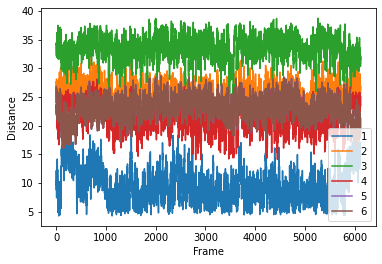

In [ ]:
frame = df.iloc[:,0]
distance1 = df.iloc[:,1]
distance2 = df.iloc[:,2]
distance3 = df.iloc[:,3]
distance4 = df.iloc[:,4]
distance5 = df.iloc[:,5]
distance5 = df.iloc[:,6]
plt.plot(frame, distance1,label = "1")
plt.plot(frame, distance2,label = "2")
plt.plot(frame, distance3,label = "3")
plt.plot(frame, distance4,label = "4")
plt.plot(frame, distance5,label = "5")
plt.plot(frame, distance5,label = "6")
plt.xlabel('Frame')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [ ]:
training_set = df.iloc[:5000, 1:2].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 100 timesteps and 1 output
X_train = []
y_train = []
for i in range(100, 5000):
    X_train.append(training_set_scaled[i-100:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
4900/4900 [==============================] - 39s 8ms/step - loss: 0.0229
Epoch 2/100
4900/4900 [==============================] - 38s 8ms/step - loss: 0.0175
Epoch 3/100
4900/4900 [==============================] - 39s 8ms/step - loss: 0.0152
Epoch 4/100
4900/4900 [==============================] - 39s 8ms/step - loss: 0.0135
Epoch 5/100
4900/4900 [==============================] - 40s 8ms/step - loss: 0.0125
Epoch 6/100
4900/4900 [==============================] - 40s 8ms/step - loss: 0.0114
Epoch 7/100
4900/4900 [==============================] - 41s 8ms/step - loss: 0.0106
Epoch 8/100
4900/4900 [==============================] - 52s 11ms/step - loss: 0.0103
Epoch 9/100
4900/4900 [==============================] - 51s 11ms/step - loss: 0.0098
Epoch 10/100
4900/4900 [==============================] - 52s 11ms/step - loss: 0.0096
Epoch 11/100
4900/4900 [==============================] - 46s 9ms/step - loss: 0.0097
Epoch 12/100
4900/4900 [==============================] - 37

In [ ]:
dataset = pd.read_csv("lysist_data.csv")
len(dataset)

6121

In [ ]:
real_stock_price = dataset.iloc[5000:, 1:2].values
dataset_train = dataset.iloc[:5000,1:2]
dataset_test = dataset.iloc[5000:,1:2]

# Getting the predicted stock price of 2017
dataset_total = dataset.iloc[:,1]
inputs = dataset_total[4900:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)
  

1221

In [ ]:
X_test = []
for i in range(100,1121):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

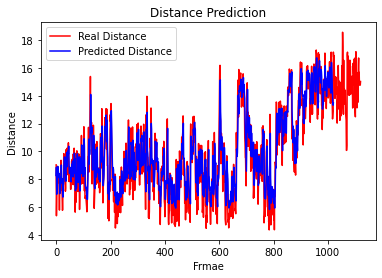

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Distance')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Distance')
plt.title('Distance Prediction')
plt.xlabel('Frmae')
plt.ylabel('Distance')
plt.legend()
plt.show()  

In [ ]:
df.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710
count,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,...,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000
mean,3060.000000,9.477217,25.617045,33.457120,21.484202,17.913996,23.161511,25.757326,32.927568,38.705092,40.473542,31.233545,39.009784,52.531725,47.759370,46.227315,40.885153,33.761991,43.178744,32.102459,39.600674,28.529239,21.641645,15.827632,40.522039,32.827767,31.307101,22.145600,49.504075,57.993788,43.424532,43.591206,53.038260,63.731056,60.877895,63.695918,69.503847,70.219686,64.331178,48.803073,...,12.670791,19.238653,19.066847,17.149477,10.532380,14.869815,17.453297,19.879113,22.623127,28.069283,18.755740,16.047709,16.535366,7.675331,12.316227,29.511815,37.289141,32.083852,24.113904,21.316004,11.048702,25.909966,34.167563,32.146684,23.191862,17.888153,27.152467,34.773060,34.968078,29.451958,22.779833,9.947350,19.483528,19.183235,11.838336,19.242492,24.434324,19.644030,14.862783,19.048115
std,1767.124831,2.962725,2.072062,2.052860,2.340583,2.396444,1.959459,3.987370,3.331065,2.216731,2.650842,3.613477,3.038124,3.120099,3.239952,2.856826,3.162908,3.587424,4.198766,3.783328,3.772023,4.045414,3.829307,3.388025,3.706266,4.077728,3.605114,3.616842,4.198449,3.867302,4.209894,4.318660,4.767989,4.134419,3.808503,3.470944,3.103216,3.051627,3.344351,3.377383,...,2.782014,2.119169,2.005391,1.510834,2.172709,1.507210,1.621759,1.297816,2.801675,1.486112,2.799165,2.423080,1.588565,1.397990,1.708860,3.341101,2.219040,2.001182,1.581754,1.712703,1.612465,4.022591,3.322457,2.581012,2.624003,2.766540,2.500420,2.486254,2.494732,2.060393,3.178298,1.938659,1.931375,3.497809,3.423552,1.962963,1.784823,2.397412,2.108530,1.402342
min,0.000000,4.250999,18.187750,23.299396,14.069786,7.597231,16.121556,10.833633,20.587201,31.925083,32.428221,21.533956,26.913871,42.860910,37.754465,36.907040,26.630256,21.245431,28.115886,20.280103,28.658839,16.941274,10.068635,6.562783,29.641223,20.366906,19.441371,11.942348,38.370051,44.776418,31.581649,32.688615,38.667770,50.188330,47.402817,52.589699,60.068007,60.764137,53.017195,39.172127,...,5.383135,13.203141,11.511060,12.462963,4.536936,9.313759,12.751544,11.562603,15.305316,23.306801,12.345838,9.754761,11.439853,4.246435,7.754345,19.448546,29.483021,24.572496,15.737415,14.358386,6.180487,15.611281,22.324438,22.059992,13.194688,8.782380,16.075824,20.978265,24.620210,19.083261,11.446913,4.780019,13.235812,9.023508,3.983300,7.250932,16.866421,11.179811,7.193507,13.919144
25%,1530.000000,7.268487,24.159547,32.224189,19.894083,16.907377,21.921775,23.488613,30.777841,37.204344,38.713538,28.607555,37.007553,50.470530,45.374332,44.158350,38.663624,31.462921,40.123014,29.300450,36.791180,25.643114,18.909905,13.253810,37.752745,29.921234,28.739638,19.525805,46.420125,55.166502,40.271855,40.465788,49.507646,60.723277,58.219931,61.023838,67.283205,6

In [ ]:
df.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710
count,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,...,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000,6121.000000
mean,3060.000000,9.477217,25.617045,33.457120,21.484202,17.913996,23.161511,25.757326,32.927568,38.705092,40.473542,31.233545,39.009784,52.531725,47.759370,46.227315,40.885153,33.761991,43.178744,32.102459,39.600674,28.529239,21.641645,15.827632,40.522039,32.827767,31.307101,22.145600,49.504075,57.993788,43.424532,43.591206,53.038260,63.731056,60.877895,63.695918,69.503847,70.219686,64.331178,48.803073,...,12.670791,19.238653,19.066847,17.149477,10.532380,14.869815,17.453297,19.879113,22.623127,28.069283,18.755740,16.047709,16.535366,7.675331,12.316227,29.511815,37.289141,32.083852,24.113904,21.316004,11.048702,25.909966,34.167563,32.146684,23.191862,17.888153,27.152467,34.773060,34.968078,29.451958,22.779833,9.947350,19.483528,19.183235,11.838336,19.242492,24.434324,19.644030,14.862783,19.048115
std,1767.124831,2.962725,2.072062,2.052860,2.340583,2.396444,1.959459,3.987370,3.331065,2.216731,2.650842,3.613477,3.038124,3.120099,3.239952,2.856826,3.162908,3.587424,4.198766,3.783328,3.772023,4.045414,3.829307,3.388025,3.706266,4.077728,3.605114,3.616842,4.198449,3.867302,4.209894,4.318660,4.767989,4.134419,3.808503,3.470944,3.103216,3.051627,3.344351,3.377383,...,2.782014,2.119169,2.005391,1.510834,2.172709,1.507210,1.621759,1.297816,2.801675,1.486112,2.799165,2.423080,1.588565,1.397990,1.708860,3.341101,2.219040,2.001182,1.581754,1.712703,1.612465,4.022591,3.322457,2.581012,2.624003,2.766540,2.500420,2.486254,2.494732,2.060393,3.178298,1.938659,1.931375,3.497809,3.423552,1.962963,1.784823,2.397412,2.108530,1.402342
min,0.000000,4.250999,18.187750,23.299396,14.069786,7.597231,16.121556,10.833633,20.587201,31.925083,32.428221,21.533956,26.913871,42.860910,37.754465,36.907040,26.630256,21.245431,28.115886,20.280103,28.658839,16.941274,10.068635,6.562783,29.641223,20.366906,19.441371,11.942348,38.370051,44.776418,31.581649,32.688615,38.667770,50.188330,47.402817,52.589699,60.068007,60.764137,53.017195,39.172127,...,5.383135,13.203141,11.511060,12.462963,4.536936,9.313759,12.751544,11.562603,15.305316,23.306801,12.345838,9.754761,11.439853,4.246435,7.754345,19.448546,29.483021,24.572496,15.737415,14.358386,6.180487,15.611281,22.324438,22.059992,13.194688,8.782380,16.075824,20.978265,24.620210,19.083261,11.446913,4.780019,13.235812,9.023508,3.983300,7.250932,16.866421,11.179811,7.193507,13.919144
25%,1530.000000,7.268487,24.159547,32.224189,19.894083,16.907377,21.921775,23.488613,30.777841,37.204344,38.713538,28.607555,37.007553,50.470530,45.374332,44.158350,38.663624,31.462921,40.123014,29.300450,36.791180,25.643114,18.909905,13.253810,37.752745,29.921234,28.739638,19.525805,46.420125,55.166502,40.271855,40.465788,49.507646,60.723277,58.219931,61.023838,67.283205,6

In [ ]:
#distances within 10 amstrong
pockets = pd.DataFrame()
for i in range(1,1710):
  for j in range(len(df)):
    if df.iloc[j,i]<=10:
      pockets[i]=df.iloc[:,i]
      break
pockets

,1,5,23,61,80,116,117,122,124,125,172,174,177,281,282,334,443,446,471,487,489,537,540,584,598,631,709,746,747,753,754,789,790,793,798,809,831,832,834,904,...,1492,1493,1495,1496,1516,1522,1523,1529,1530,1541,1542,1559,1625,1626,1627,1634,1635,1642,1643,1646,1647,1651,1652,1653,1667,1669,1670,1671,1675,1676,1682,1684,1685,1691,1696,1702,1704,1705,1706,1709
0,9.726705,19.786005,21.265138,14.504710,18.366719,12.584318,6.722097,15.265429,12.765029,13.838940,15.791643,9.809287,15.083901,11.272496,17.477395,24.123319,19.809517,14.534806,17.979484,14.108645,17.765180,13.136035,14.068155,6.505534,15.706440,18.895934,13.856154,19.092234,19.686018,15.811606,31.938676,5.537821,15.053771,18.441830,10.424908,6.800898,11.225661,6.917441,16.687029,17.980472,...,9.486625,15.807110,11.998359,4.304560,13.460479,10.509863,15.419306,17.190548,13.943556,14.057257,11.755703,17.015562,13.891155,6.898583,12.102931,16.941863,14.235648,19.257075,23.836753,14.258182,9.895503,14.562313,10.985670,17.861491,12.287069,11.638666,6.325979,17.386725,15.483732,17.160587,26.854432,6.340050,11.271934,8.684154,19.132762,12.480601,22.570040,10.444981,11.565586,21.986102
1,9.726705,19.786005,21.265138,14.504710,18.366719,12.584318,6.722097,15.265429,12.765029,13.838940,15.791643,9.809287,15.083901,11.272496,17.477395,24.123319,19.809517,14.534806,17.979484,14.108645,17.765180,13.136035,14.068155,6.505534,15.706440,18.895934,13.856154,19.092234,19.686018,15.811606,31.938676,5.537821,15.053771,18.441830,10.424908,6.800898,11.225661,6.917441,16.687029,17.980472,...,9.486625,15.807110,11.998359,4.304560,13.460479,10.509863,15.419306,17.190548,13.943556,14.057257,11.755703,17.015562,13.891155,6.898583,12.102931,16.941863,14.235648,19.257075,23.836753,14.258182,9.895503,14.562313,10.985670,17.861491,12.287069,11.638666,6.325979,17.386725,15.483732,17.160587,26.854432,6.340050,11.271934,8.684154,19.132762,12.480601,22.570040,10.444981,11.565586,21.986102
2,9.726705,19.786005,21.265138,14.504710,18.366719,12.584318,6.722097,15.265429,12.765029,13.838940,15.791643,9.809287,15.083901,11.272496,17.477395,24.123319,19.809517,14.534806,17.979484,14.108645,17.765180,13.136035,14.068155,6.505534,15.706440,18.895934,13.856154,19.092234,19.686018,15.811606,31.938676,5.537821,15.053771,18.441830,10.424908,6.800898,11.225661,6.917441,16.687029,17.980472,...,9.486625,15.807110,11.998359,4.304560,13.460479,10.509863,15.419306,17.190548,13.943556,14.057257,11.755703,17.015562,13.891155,6.898583,12.102931,16.941863,14.235648,19.257075,23.836753,14.258182,9.895503,14.562313,10.985670,17.861491,12.287069,11.638666,6.325979,17.386725,15.483732,17.160587,26.854432,6.340050,11.271934,8.684154,19.132762,12.480601,22.570040,10.444981,11.565586,21.986102
3,12.172530,18.260891,23.127760,15.288958,19.341422,13.933901,6.107782,15.707999,13.740635,11.532998,16.065069,10.280490,14.048248,11.210213,17.969138,24.005421,23.174118,14.186969,15.090681,15.122556,16.025157,12.588968,14.685572,7.354523,14.268051,19.108742,13.990323,17.266203,17.849530,14.674660,30.936799,5.204095,13.302665,22.532486,10.358171,6.776740,11.908168,10.401136,15.965422,17.233581,...,12.968172,17.933337,14.382470,6.744459,14.937524,8.653700,13.477665,17.056609,14.330824,10.626025,11.095951,15.922377,12.910006,5.846320,13.317003,17.043431,15.027213,17.663976,27.034769,13.738768,9.059915,14.574957,11.541966,18.404437,13.410479,12.828989,7.186786,17.006331,12.118584,15.239307,26.365356,8.395434,12.419805,9.535649,18.916754,15.090211,19.524167,10.600498,12.602482,19.790392
4,10.445720,17.307770,20.606089,17.214625,19.004247,14.259559,6.571408,13.892687,12.577068,12.100069,14.423294,9.825687,14.549771,14.523172,17.288420,23.844637,22.502616,15.284204,13.542219,14.809394,15.688734,15.421963,13.252618,6.708881,17.054053,17.829881,20.527700,16.819896,16.912921,18.506015,31.277609,5.567677,14.260748,21.174904,12.175299,7.393321,13.005803,11.925920,14.930618,15.449484,...,12.917883,17.844204,14.680279,6.276340,14.633917,9.563484,13.604264,16

In [ ]:
l=[]
for column in pockets.columns:
  count=0
  for i in range(6121):
    if pockets[column][i]<=10:
      count+=1
  l.append(count)



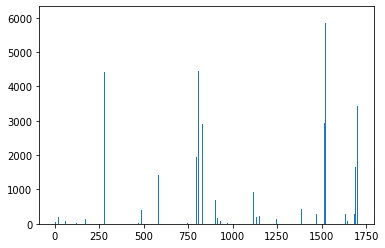

In [ ]:
x=pockets.columns
plt.bar(x,l,width=1.6,)
plt.show()

<function matplotlib.pyplot.show>

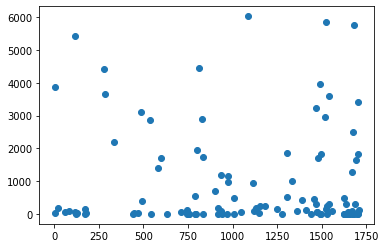

In [ ]:
plt.scatter(x,l)
plt.show

In [ ]:
pip install ruptures


  Created wheel for ruptures: filename=ruptures-1.0.3-cp36-none-any.whl size=55251 sha256=f5f5404df8ad7752cf984c1b13e5b26d6e913e1fc8700016632cad56379de67a
  Stored in directory: /root/.cache/pip/wheels/8b/a2/15/6e7b600d1415d6d3e746e3004dc23eef3bf7778d35e6afebac
Successfully built ruptures


In [ ]:
l=df.iloc[:,1]

In [ ]:
len(l)

6121

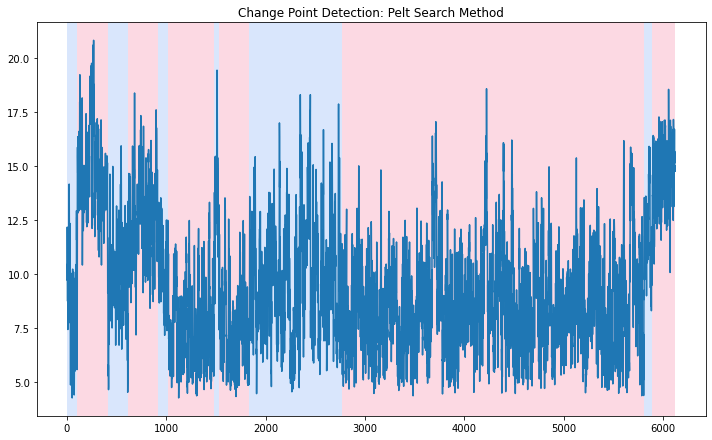

In [ ]:
import ruptures as rpt
points=l.values.reshape(-1,1)
    
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=20)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

In [ ]:
import ruptures as rpt
d=df.iloc[:,1522]
points=d.values.reshape(-1,1)
    
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=20)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

In [ ]:
import ruptures as rpt
d=df.iloc[:,1643]
points=d.values.reshape(-1,1)
    
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=20)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  